
# **TikTok Project**
**Coursera - The Power of Statistics**

* **The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze hypothesis tests.

* **The goal** is to apply descriptive and inferential statistics, probability distributions, and hypothesis testing in Python.
<br/>

## Problem statements
1. Do videos from verified & unverified accounts have different average view counts?
2. Is there a relationship between account being verified and the associated videos' view counts?

### **1. Imports packages**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ztest
from scipy import stats

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **2. Data exploration**

Use descriptive statistics to conduct Exploratory Data Analysis (EDA).

In [3]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
data.shape

(19382, 12)

In [5]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [6]:
data.dropna(inplace=True)

We are interested in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [7]:
pd.DataFrame(round(data.groupby('verified_status')['video_view_count'].mean(), 2))

,video_view_count
verified_status,
not verified,265663.79
verified,91439.16


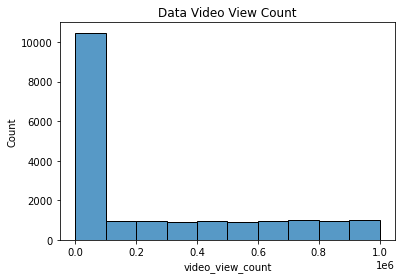

In [8]:
fig = sns.histplot(x=data['video_view_count'], bins=10)
fig.set_title('Data Video View Count')
plt.show();

### **3. Hypothesis testing**

The goal in this step is to conduct a two-sample z-test. Here are the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
        * $H_0$: there is NO difference in number of views between TikTok videos posted by verified or unverified accounts
        * $H_1$: there is a difference in number of views between TikTok videos posted by verified or unverified accounts
2.   Choose a signficance level
        * We use 5% as the significance level and proceed with a two-sample z-test.
3.   Find the p-value
        * We use z-score to find this
4.   Reject or fail to reject the null hypothesis

In [9]:
user_verified = data[data['verified_status']=='verified']['video_view_count']
user_not_verified = data[data['verified_status']=='not verified']['video_view_count']

test_statistic, p_value = ztest(x1=user_verified,
                                x2=user_not_verified,
                                alternative='two-sided',
                                ddof=1)


print(f'Z-test\n• Z-score: {test_statistic}')
print(f'• P-value: {p_value}\n\nTest result:')

if p_value < 0.05:
    print('• REJECT the null hypothesis')
else:
    print('• FAIL TO REJECT the null hypothesis')

Z-test
• Z-score: -18.250939509545827
• P-value: 2.0338134031296587e-74

Test result:
• REJECT the null hypothesis


### **4. Conclusion**
The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.